# <center> **Multiple Linear Regression: Student Performance**
#### <center> By: Johann Sebastian E. Catalla, BSCS-II
#### <center> An output for the course Data Alchemy
***

The Student Performance Dataset was sourced through kaggle. It is designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.
<br>
<h4>Independent Variables:</h4>

<li>Hours Studied: The total number of hours spent studying by each student.
<li>Previous Scores: The scores obtained by students in previous tests.
<li>Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
<li>Sleep Hours: The average number of hours of sleep the student had per day.
<li>Sample Question Papers Practiced: The number of sample question papers the student practiced.</li>

<h4>Target Variable:</h4>

<li> Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.</li>

## Importing the Libraries

In [181]:
import pandas as pd
import numpy as np
import hvplot.pandas
import holoviews as hv


## Importing Dataset

In [182]:
dataset = pd.read_csv('Student_Performance.csv')
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Data Exploration

In [183]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [184]:
dataset.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### Check for Duplicates

In [185]:
# Check number of duplicates
dataset.duplicated().sum()

127

In [186]:
# Drop duplicates and reset index
dataset.drop_duplicates(inplace=True)
dataset.reset_index(inplace=True, drop=True)
dataset

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9868,1,49,Yes,4,2,23.0
9869,7,64,Yes,8,5,58.0
9870,6,83,Yes,8,5,74.0
9871,9,97,Yes,7,0,95.0


### Check for Null values

In [187]:
dataset.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Visualizing each independent variable with the dependent variable 

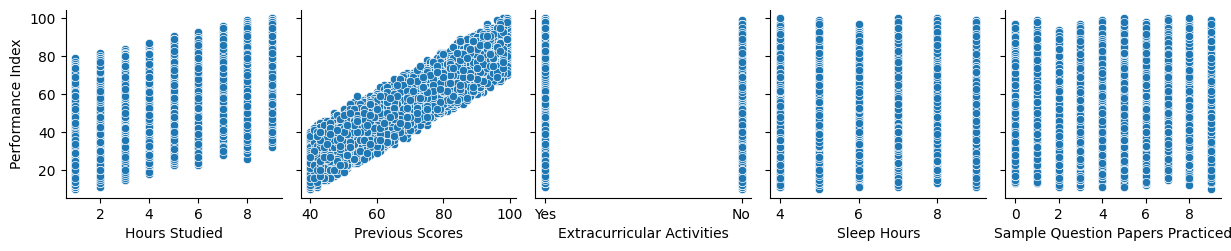

In [188]:
import seaborn as sns

sns.pairplot(dataset, y_vars='Performance Index', x_vars=['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'])

In [216]:
dataset.hvplot.hist('Performance Index') * hv.VLine(x=dataset['Performance Index'].median()).options(color='black') * hv.Text(56, 860, "Median = 55", halign='left')

:Overlay
   .Histogram.I :Histogram   [Performance Index]   (Performance Index_count)
   .VLine.I     :VLine   [x,y]
   .Text.I      :Text   [x,y]

## Data Cleaning 

In [190]:
# Label Encoding the Categorical Column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset["Extracurricular Activities"] = encoder.fit_transform(dataset["Extracurricular Activities"])

dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [191]:
dataset.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

### Check for Multicollinearity by calculating Correlation Coefficient and Variance Inflation Factor (VIF)

In [220]:
correlation = dataset[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].corr()

correlation.hvplot.heatmap(height=700, width=800, rot=45, cmap='YlGnBu', fontsize={'xticks': 8, 'yticks': 8, 'title': 15})

:HeatMap   [columns,index]   (value)

In [193]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# function to compute vif
def compute_vif(considered_features):
    
    X = dataset[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

vif = compute_vif(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'])
print(vif)

                           Variable       VIF
0                     Hours Studied  1.000393
1                   Previous Scores  1.000350
2        Extracurricular Activities  1.000888
3                       Sleep Hours  1.000676
4  Sample Question Papers Practiced  1.000540


Since our VIF values are ≈ 1, there is no multicollinearity present.

## Training the Model

In [194]:
# Splitting data into Indipendent and Dependent Variable
X = dataset.drop("Performance Index", axis=1)
y = dataset["Performance Index"]

In [195]:
# Splitting data into Train and Test set
from sklearn.model_selection import train_test_split

# Split with test size of 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [196]:
# get shapes of X_train,y_train, X_test, y_test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6911, 5)
(2962, 5)
(6911,)
(2962,)


### Training

In [197]:
# Training a Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Testing

In [198]:
# Predicting Test Set Results
y_pred = regressor.predict(X_test)
y_pred = np.round_(y_pred, decimals = 2)

In [199]:
# Actual Values vs Predicted Values
comparison = pd.DataFrame({'Actual Performance': y_test, 'Predicted Performance': y_pred})
comparison.head()

,Actual Performance,Predicted Performance
6057,47.0,46.47
106,76.0,80.25
9154,62.0,61.03
4680,23.0,22.73
2149,76.0,74.84


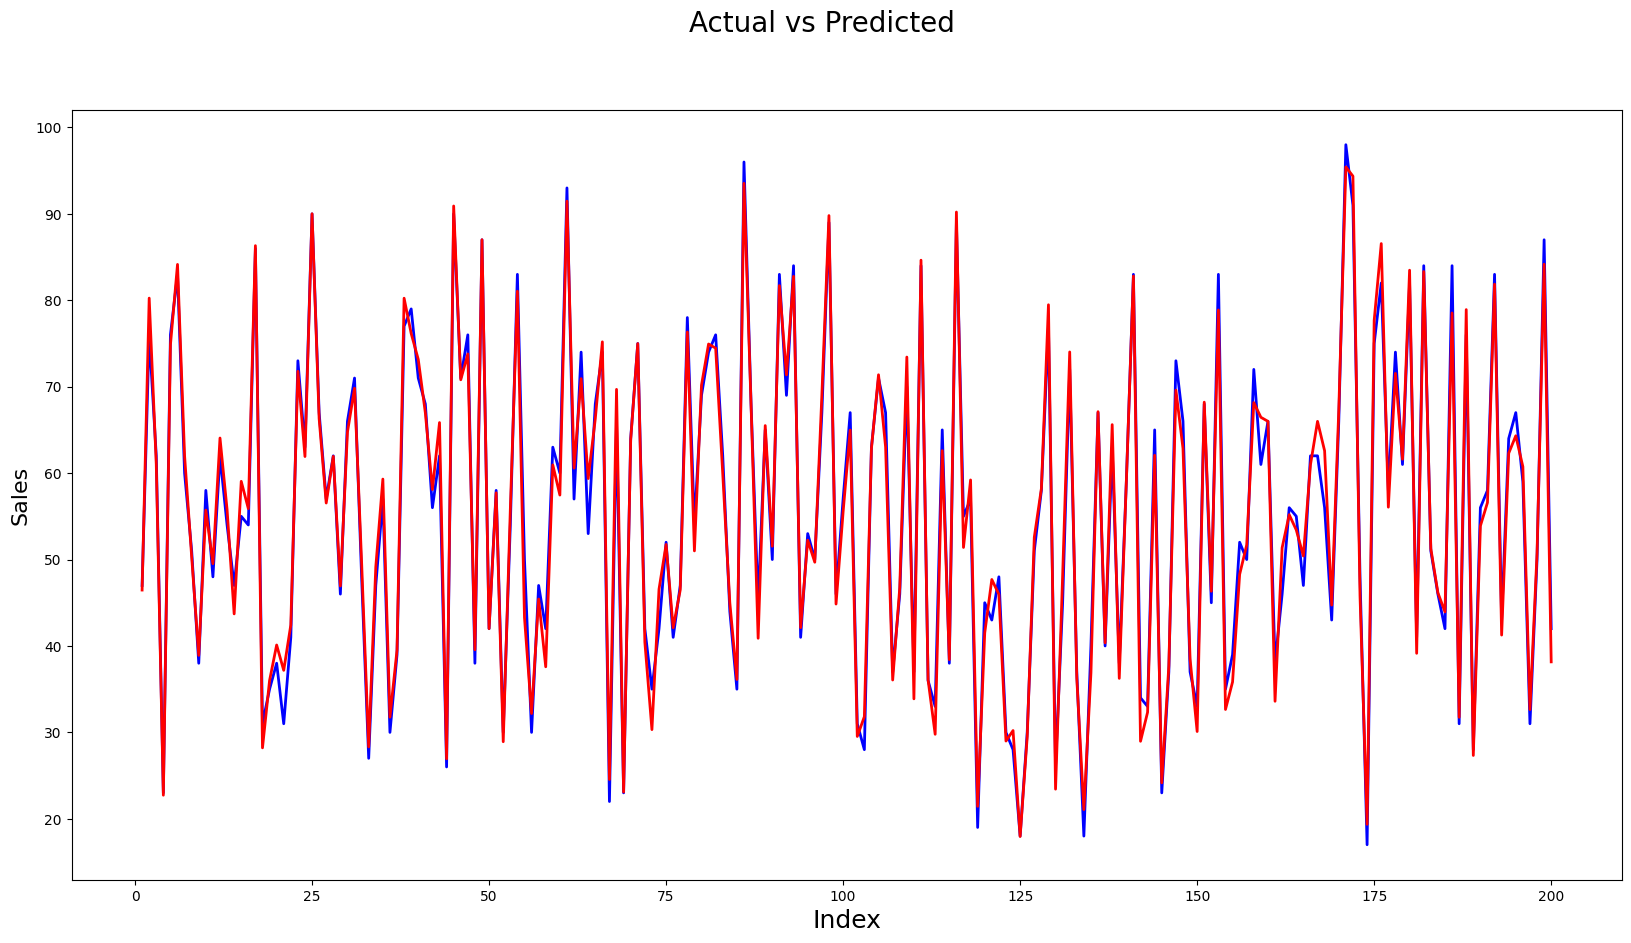

In [200]:
# Actual vs Predicted
import matplotlib.pyplot as plt

c = [i for i in range(1,201,1)] # generating index 
fig = plt.figure(figsize=(20,10))
plt.plot(c,y_test[:200], color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred[:200], color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual vs Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                             
plt.ylabel('Sales', fontsize=16)     
plt.show()

## Model Performance
- Root Mean Square Error (RMSE) value
- R Square value

In [201]:
# import mean_squared_error module
from sklearn.metrics import mean_squared_error as mse


# Calculate and print Root Mean Square Error(RMSE)
mse = mse(y_test,y_pred)
rmse = np.sqrt(mse)

print(f'RMSE value:: {rmse}')

RMSE value:: 2.0798946728383347


The RMSE value is 2.08, which means that, on average, the difference between the predicted values and the actual values is approximately 2.08 units

In [202]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mean_er = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : ', mean_er)
print('R Square : ', r2)

Mean Squared Error :  4.325961850101283
R Square :  0.9881598981021315


- The Mean Squared Error is 4.3, it means that, on average, the squared difference between the predicted values and the actual values is 4.3 units. 
- The R-squared of 0.99, it means that the model is highly effective at predicting or explaining the changes in the dependent variable based on the changes in the independent variable(s)

## Check for Overfitting and Underfitting

In [206]:
print(f'Training set score:: {regressor.score(X_train,y_train)}')
print(f'Test set score:: {regressor.score(X_test,y_test)}')

Training set score:: 0.9888937265788157
Test set score:: 0.9881593003934889


### Checking linearity
I used a scatter plot of residual versus predicted value to check for linearity. The horizontal band of points indicates a linear relationship

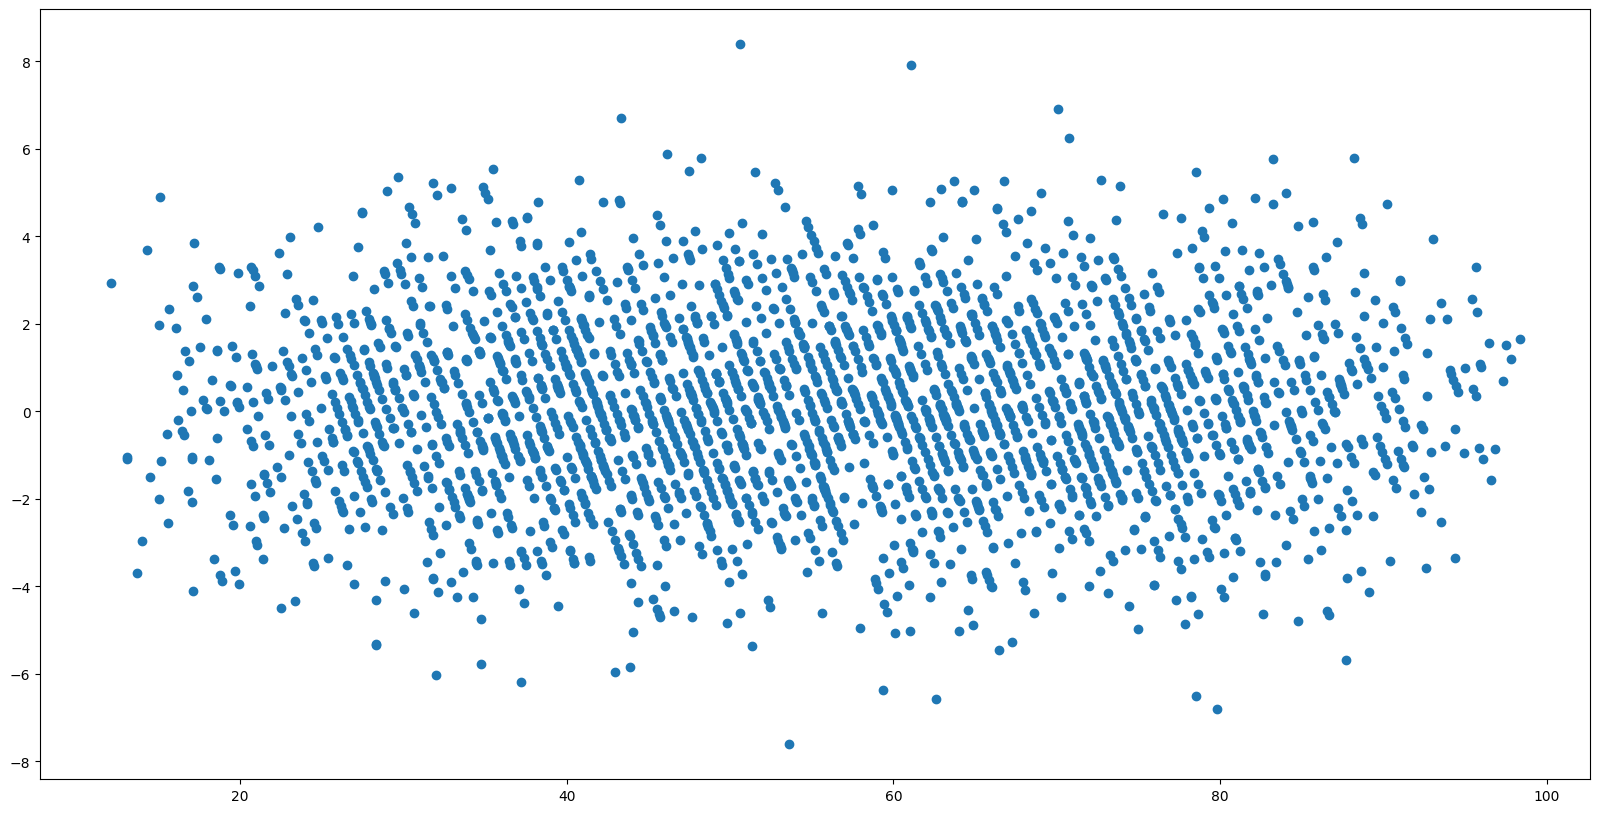

In [205]:
residuals = y_test - y_pred
plt.figure(figsize=(20,10))
plt.scatter(x=y_pred, y=residuals)
plt.show()

### Checking for overall heteroscedasticity

I used the actual values vs residuals to check for heteroscedasticity. Visually, if there appears to be a fan or cone shape in the residual plot, it indicates the presence of heteroscedasticity. In our case the error term is the same across the regression line because the plots are scattered evenly.

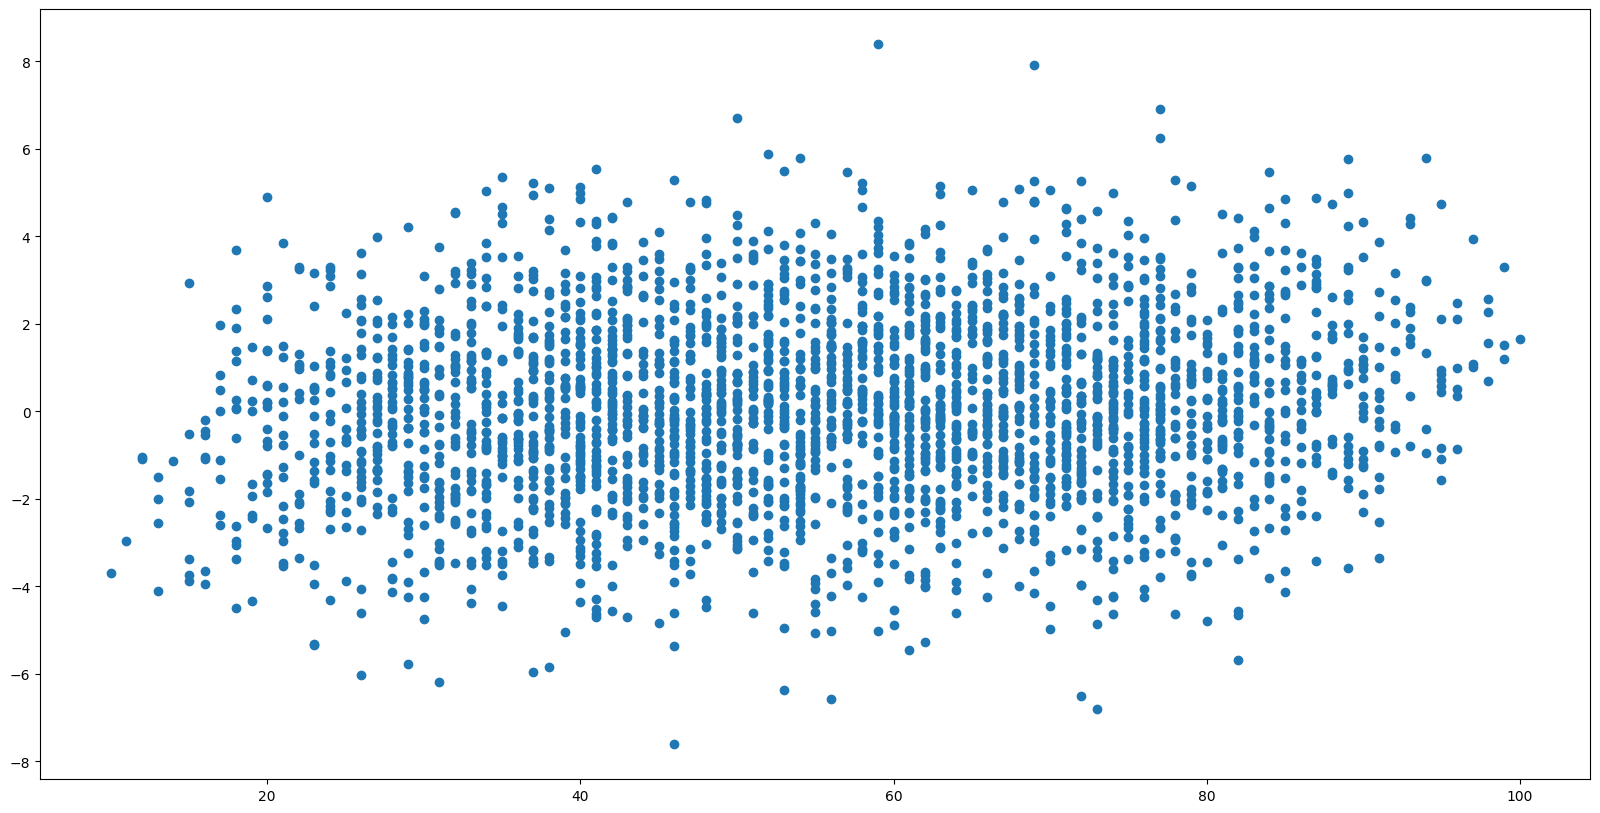

In [204]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.figure(figsize=(20,10))
plt.scatter(x=y_test, y=residuals)
plt.show()

## Interpretation and Conclusion

### Constructing the regression equation

In [203]:
print(regressor.coef_)
print(regressor.intercept_)

[2.84924135 1.01823681 0.55684553 0.4700014  0.19339224]
-33.96701551454479


Therefore the equation is:
<br><br>
<b>y = 2.85×Hours Studied + 1.02×Previous Scores + 0.56×Extracurricular Activities + 0.47×Sleep Hours + 0.19×Sample Question Papers Practiced - 33.97</b>

After successfully performing multiple linear regression to predict student performance based on the variables 'Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', and 'Sample Question Papers Practiced', we can draw the following conclusions:
1. The RMSE value is 2.08, which means that, on average, the difference between the predicted values and the actual values is approximately 2.08 units which indicates that the model's predictions are reasonably accurate.
2. The Mean Squared Error is 4.3, it means that, on average, the squared difference between the predicted values and the actual values is 4.3 units.
3. The R-squared of 0.99, it means that the model is highly effective at predicting or explaining the changes in the dependent variable based on the changes in the independent variables.
4. The model correctly predicted the target variable for 99% of the samples in both the training and test datasets. This level of accuracy indicates that the model is performing very well on both datasets, which tells us that there is no underfitting or overfitting present.

Recommendations:
1. Identify At-Risk Students and use the model for intervention.
2. Periodically update and refine the regression model as new data becomes available. 
3. Incorporating additional relevant variables into the regression model like socioeconomic status, learning styles, and access to educational resources.

Comments:
1. Check for other assumptions.
2. Consider additional variables.
2. The relationships between the variables and the performance index may not reflect real-world scenarios because this dataset is synthetic and created for illustrative purposes.
3. Perform linear regression with other libraries.
4. Create more comprehensive data visualizations.